<a href="https://colab.research.google.com/github/Begemot911/python_test/blob/main/%D0%9C%D0%B5%D0%B4%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F7_%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rwQRsjsUgJjFYJH5OhkzOC7PeezZhdEl' -O heart.csv

--2025-01-07 13:45:47--  https://docs.google.com/uc?export=download&id=1rwQRsjsUgJjFYJH5OhkzOC7PeezZhdEl
Resolving docs.google.com (docs.google.com)... 173.194.193.139, 173.194.193.101, 173.194.193.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.193.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1rwQRsjsUgJjFYJH5OhkzOC7PeezZhdEl&export=download [following]
--2025-01-07 13:45:47--  https://drive.usercontent.google.com/download?id=1rwQRsjsUgJjFYJH5OhkzOC7PeezZhdEl&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.121.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [application/octet-stream]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 

In [ ]:
# устанавливаем нужную версию библиотеки sklearn, чтобы ответы сошлись
!pip install scikit-learn==0.22.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-learn)


In [ ]:
import numpy as np
import pandas as pd

В этом задании вы будете работать с [данными о пациентах, у части которых есть заболевание сердца](https://www.kaggle.com/ronitf/heart-disease-uci). Вам нужно построить модель, классифицирующую пациентов на больных этим заболеванием и тех, у кого его нет, а также проанализировать результаты.

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.loc[:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Разделим данную выборку на обучающую и тестовую части в отношении 3:1.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.25, random_state=13)
X_train.shape, X_test.shape

((227, 13), (76, 13))

1. Обучите решающее дерево из `sklearn` (`sklearn.tree.DecisionTreeClassifier`) без ограничения на максимальную глубину (`max_depth=None`). В качестве сида поставьте `random_state=13`.

   Подробнее о параметрах можно почитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

   Найдите долю правильных ответов полученного алгоритма на обучающей выборке (**в процентах**). Ответ округлите до двух знаков после запятой. Например, если значение доли правильных ответов будет равно 0.1234, то ответом будет 12.34 - ведь это 12.34%.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=13,max_depth=None)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_train)

In [ ]:
round(accuracy_score(y_pred_dt, y_train)*100,2)

100.0

2. Теперь найдите долю правильных ответов полученного алгоритма на тестовой выборке (**в процентах**). Ответ округлите до двух знаков после запятой.

    Заметно ли переобучение?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=13,max_depth=None)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
round(accuracy_score(y_pred_dt, y_test)*100,2)

67.11

3. Подберите с помощью кросс-валидации оптимальные гиперпараметры алгоритма. Выбирайте из следующих наборов:


- `max_depth`: [3, 4, 5, 6, 7, 8, 9, 10, None]
- `max_features`: ['auto', 'log2', None]
- `min_samples_leaf`: range(1, 10)
- `min_samples_split`: range(2, 10)
- `criterion`: ['gini', 'entropy']

    В этом вам поможет метод `sklearn.model_selection.GridSearchCV`. Подробнее о том, какие параметры и методы в нем используются, и о примерах работы с ним можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
    
    1) Создайте решающее дерево - не забудьте поставить `random_state=13`.
    
    2) Задайте `param_grid` - сетку (словарь) гиперпараметров и их значений, по которой будет проходить метод.
    
    3) Вызовите метод `GridSearchCV` - в качестве параметра `estimator` задайте решающее дерево из первого шага, `param_grid` - сетку из второго. Задайте параметр `cv=5`, чтобы кросс-валидация проходила по 5 фолдам. Также задайте параметр `scoring='accuracy'`, чтобы оценка качества моделей на кросс-валидации проходила с помощью доли правильных ответов. Запустите метод на обучающей выборке с помощью `fit`.
    
    4) Выведите лучшие параметры с помощью атрибута `best_params_`.
    
    Какое значение глубины дерева получилось оптимальным?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=13,max_depth=None)
tree.fit(X_train, y_train)
y_pred_dt = tree.predict(X_train)


In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state=5,max_depth=None)
clf=clf.fit(X_train, y_train)



In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

NameError: name 'tree' is not defined

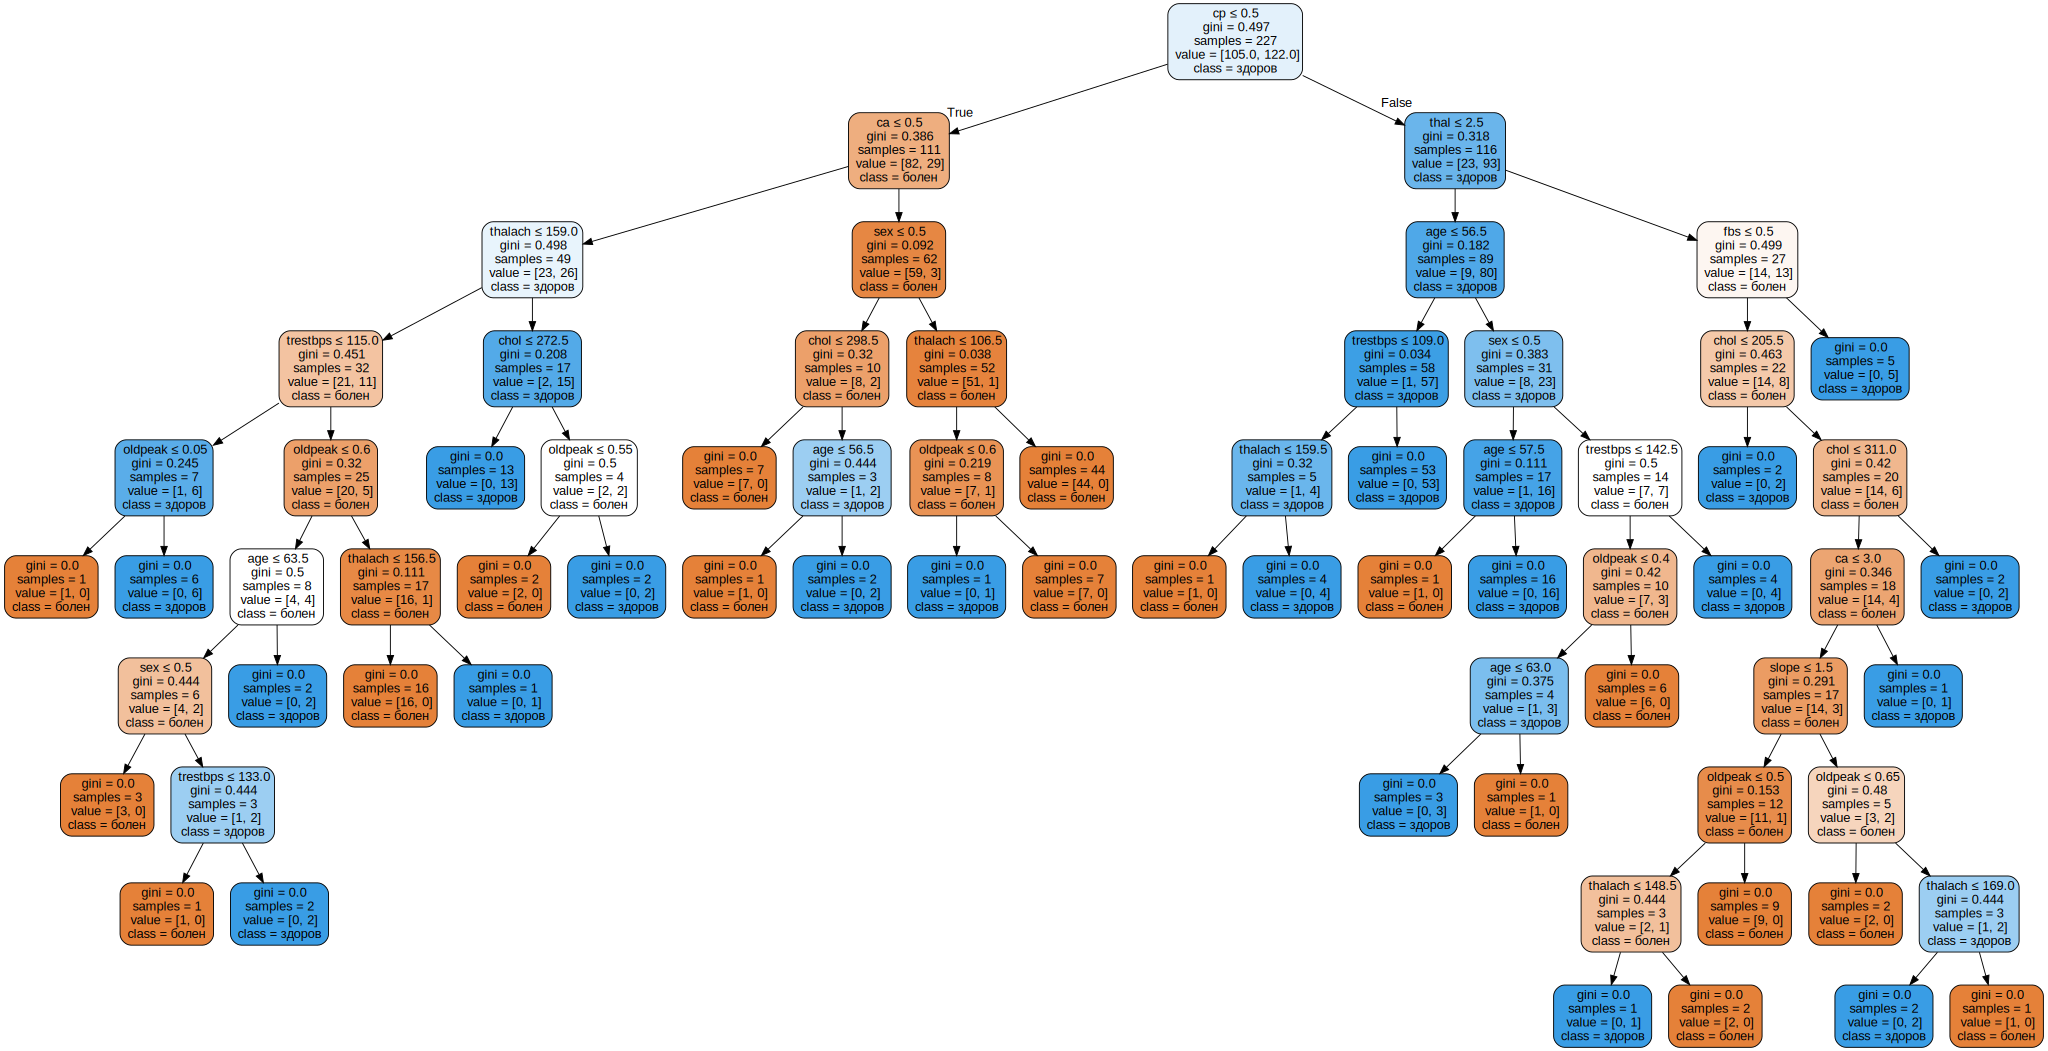

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names=data.columns[0:13],
                     class_names=["болен", "здоров"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_searcher = GridSearchCV (DecisionTreeClassifier(random_state=13,max_depth=None),
                             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                                         'max_features': ['auto', 'log2', None],
                                         'min_samples_leaf': range(1, 10),
                                         'min_samples_split': range(2, 10),
                                        'criterion': ['gini', 'entropy']},
                             cv=5,

                             scoring='accuracy')

In [ ]:
grid_searcher.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6480 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

In [ ]:
grid_searcher.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 9}

4. Какое лучшее усредненное значение доли правильных ответов получилось на кросс-валидации (для оптимальных значений гиперпараметров)? Вам поможет атрибут `best_score_`. Ответ округлите до двух знаков после запятой и дайте в процентах.

In [ ]:
print(round(grid_searcher.best_score_*100,2))

83.24


5. Найдите долю правильных ответов решающего дерева с подобранными оптимальными значениями гиперпараметров на обучающей выборке (**в процентах**). Ответ округлите до двух знаков после запятой.

In [ ]:
best_predictions = grid_searcher.predict(X_train)

print(round(accuracy_score(best_predictions, y_train)*100,2))

90.75


6. Найдите долю правильных ответов решающего дерева с подобранными оптимальными значениями гиперпараметров на тестовой выборке (**в процентах**). Ответ округлите до двух знаков после запятой.

    Уменьшилось ли переобучение?

In [ ]:
best_predictions = grid_searcher.predict(X_test)
print(round(accuracy_score(best_predictions, y_test)*100,2))

73.68


In [ ]:
best_predictions

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

7. Решающее дерево позволяет предсказывать не только классы, но и вероятности классов - с помощью метода `predict_proba`. Посмотрите на вероятности классов полученного решающего дерева и посчитайте значение AUC-ROC. Ответ округлите до двух знаков после запятой.

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred = grid_searcher.predict_proba(X_test)[:,1]

print(round(roc_auc_score(y_test, y_pred),2))

0.77


In [ ]:
y_pred

array([0.        , 1.        , 0.66666667, 0.57142857, 0.2       ,
       0.25      , 0.71428571, 0.2       , 1.        , 0.66666667,
       1.        , 1.        , 0.33333333, 0.33333333, 1.        ,
       0.42857143, 0.14285714, 0.33333333, 0.33333333, 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.25      ,
       0.57142857, 0.42857143, 0.33333333, 0.66666667, 0.        ,
       0.        , 1.        , 0.        , 0.2       , 0.        ,
       1.        , 0.33333333, 0.        , 0.57142857, 0.42857143,
       0.66666667, 0.        , 0.2       , 0.14285714, 0.2       ,
       1.        , 0.        , 1.        , 0.33333333, 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.2       , 0.        , 1.     

In [ ]:
y_test

,target
203,0
30,1
58,1
90,1
119,1
...,...
66,1
184,0
290,0
140,1


8. Какой признак является самым важным по мнению полученного решающего дерева? Чтобы это проверить, вам поможет атрибут `feature_importances_`.

In [ ]:
dt.feature_importances_

array([0.07773343, 0.045513  , 0.30305604, 0.11124416, 0.08185137,
       0.02923589, 0.        , 0.05894548, 0.        , 0.0862486 ,
       0.01808537, 0.12413278, 0.06395387])

In [ ]:
grid_searcher.best_estimator_.feature_importances_

array([0.00768745, 0.11857961, 0.        , 0.00622126, 0.03031571,
       0.        , 0.00554163, 0.15552678, 0.15383366, 0.06550299,
       0.23535585, 0.18479243, 0.03664263])

In [ ]:
max(grid_searcher.best_estimator_.feature_importances_)

0.23535584619015162

In [ ]:
#значит третий признак с 0.235 самый важный, это признак slope

In [ ]:
tree.plot_tree(tree)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'